In [ ]:
import pandas as pd
import tensorflow as tf

Выбрал данные по кредитному скорингу, так как хотел бы работать в банке и интересуюсь поведенческой экономикой

In [ ]:
data = pd.read_csv('application_record.csv')

In [ ]:
data.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
data['CODE_GENDER']=data['CODE_GENDER'].replace({'M':0, 'F':1})

In [ ]:
data['FLAG_OWN_CAR']=data['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})

In [ ]:
set(data['NAME_INCOME_TYPE'])

{'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working'}

In [ ]:
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].replace({'Commercial associate':3, 'Pensioner':4, 'State servant':1, 'Student':0, 'Working':2})

In [ ]:
set(data['NAME_EDUCATION_TYPE'])

{'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special'}

In [ ]:
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].replace({'Academic degree':4, 'Higher education':3,'Incomplete higher':2, 'Lower secondary':0, 'Secondary / secondary special':1})

In [ ]:
set(data['NAME_FAMILY_STATUS'])

{'Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow'}

In [ ]:
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace({'Civil marriage':3,
 'Marrie':4,
 'Married':5,
 'Separated':1,
 'Single / not married':0,
 'Widow':2})

In [ ]:
set(data['NAME_HOUSING_TYPE'])

{'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents'}

In [ ]:
data.shape

(438557, 18)

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(304354, 18)

In [ ]:
set(data['NAME_HOUSING_TYPE'])

{'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents'}

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_data = pd.DataFrame(ohe.fit_transform(data[['NAME_HOUSING_TYPE']]), columns=ohe.get_feature_names_out())
data = pd.concat([data.drop('NAME_HOUSING_TYPE', axis=1), encoded_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_data = pd.DataFrame(ohe.fit_transform(data[['OCCUPATION_TYPE']]), columns=ohe.get_feature_names_out())
data = pd.concat([data.drop('OCCUPATION_TYPE', axis=1), encoded_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan
2,5008806.0,0.0,1.0,Y,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5008808.0,1.0,0.0,Y,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008809.0,1.0,0.0,Y,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,5008810.0,1.0,0.0,Y,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5008811.0,1.0,0.0,Y,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace({'Y':0, 'N':1})

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan
2,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5008808.0,1.0,0.0,0.0,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008809.0,1.0,0.0,0.0,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,5008810.0,1.0,0.0,0.0,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5008811.0,1.0,0.0,0.0,0.0,270000.0,3.0,1.0,0.0,-19110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
credit_record = pd.read_csv('credit_record.csv')
credit_record.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


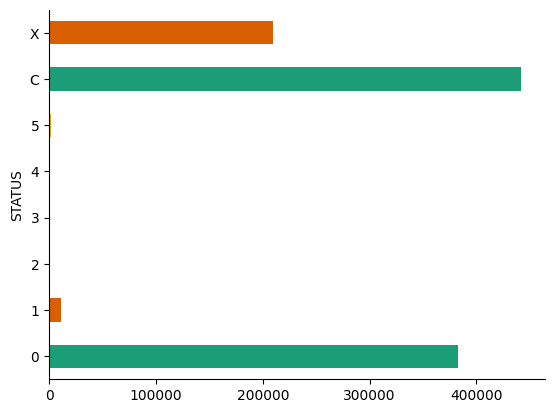

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
credit_record.groupby('STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
credit_record['STATUS'] = credit_record['STATUS'].replace({'X':-2, 'C':-1, '0':0, '1':1, '2':2, '3':3, '4':4, '5':5})

In [ ]:
merged_data = pd.merge(data, credit_record, on='ID', how='inner')

In [ ]:
merged_data.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,MONTHS_BALANCE,STATUS
0,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-1
1,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,-1


In [ ]:
merged_data = merged_data.dropna()
merged_data = merged_data.reset_index(drop=True)
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,MONTHS_BALANCE,STATUS
0,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-1
1,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,-1
2,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2,-1
3,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-3,-1
4,5008806.0,0.0,1.0,0.0,0.0,112500.0,2.0,1.0,5.0,-21474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531133,5150468.0,1.0,0.0,0.0,0.0,180000.0,2.0,1.0,5.0,-17713.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,0
531134,5150468.0,1.0,0.0,0.0,0.0,180000.0,2.0,1.0,5.0,-17713.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2,0
531135,5150468.0,1.0,0.0,0.0,0.0,180000.0,2.0,1.0,5.0,-17713.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-3,0
531136,5150468.0,1.0,0.0,0.0,0.0,180000.0,2.0,1.0,5.0,-17713.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-4,0


In [ ]:
X = merged_data.iloc[:, 1:-2]
y = merged_data.iloc[:, -1]
X = X.astype(np.float32)
y = y.astype(np.float32)

In [ ]:
X.shape

(531138, 40)

In [ ]:
y.shape

(531138,)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
set(y_train)

{-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [ ]:
set(y_test)

{-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan
40830,1.0,0.0,0.0,0.0,202500.0,2.0,1.0,5.0,-15231.0,-8375.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96350,1.0,0.0,0.0,0.0,630000.0,2.0,3.0,1.0,-22001.0,-1539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420492,1.0,0.0,0.0,0.0,112500.0,2.0,1.0,2.0,-16917.0,-4081.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307256,0.0,1.0,0.0,2.0,225000.0,2.0,1.0,5.0,-12030.0,-1409.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
255082,1.0,0.0,0.0,0.0,247500.0,2.0,1.0,5.0,-11268.0,-2545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,1.0,1.0,0.0,0.0,117000.0,2.0,1.0,5.0,-17134.0,-1986.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259178,1.0,0.0,0.0,3.0,140400.0,2.0,1.0,5.0,-12372.0,-3246.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365838,0.0,1.0,0.0,1.0,225000.0,3.0,1.0,5.0,-13744.0,-1934.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
131932,1.0,1.0,1.0,0.0,180000.0,3.0,1.0,1.0,-15351.0,-6790.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

,STATUS
40830,-1.0
96350,-1.0
420492,-2.0
307256,0.0
255082,-2.0
...,...
110268,0.0
259178,-1.0
365838,0.0
131932,0.0


In [ ]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
class_weights

{0: 0.652743640162222,
 1: 0.29710661744140515,
 2: 0.3334740761203963,
 3: 11.405142795791281,
 4: 327.86265432098764,
 5: 781.0845588235294,
 6: 983.5879629629629,
 7: 95.70045045045045}

In [ ]:
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=5, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.3750 - loss: 70.2659 - val_accuracy: 0.3749 - val_loss: -12.6576
Epoch 2/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.3756 - loss: 73.7792 - val_accuracy: 0.3749 - val_loss: -12.6576
Epoch 3/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.3743 - loss: 72.1492 - val_accuracy: 0.3749 - val_loss: -12.6576
Epoch 4/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.3737 - loss: 70.9555 - val_accuracy: 0.3749 - val_loss: -12.6576
Epoch 5/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3749 - loss: 74.1627 - val_accuracy: 0.3749 - val_loss: -12.6576
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3763 - loss: -12.6238
Test Loss: -12.657612800598145
Test Accuracy: 0.37486350536346436


In [ ]:
from tensorflow.keras.regularizers import L1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=L1(l1=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=5, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.3603 - loss: 68.7368 - val_accuracy: 0.3749 - val_loss: -12.6559
Epoch 2/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3749 - loss: 70.6670 - val_accuracy: 0.3749 - val_loss: -12.6559
Epoch 3/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.3761 - loss: 67.5538 - val_accuracy: 0.3749 - val_loss: -12.6572
Epoch 4/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3740 - loss: 69.6888 - val_accuracy: 0.3749 - val_loss: -12.6562
Epoch 5/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.3753 - loss: 70.8112 - val_accuracy: 0.3749 - val_loss: -12.6574
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3763 - loss: -12.6236
Test Loss: -12.6574068069458
Test Accuracy: 0.37486350536346436


In [ ]:
from tensorflow.keras.regularizers import L1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=L1(l1=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=5, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.3376 - loss: 59.8898 - val_accuracy: 0.3749 - val_loss: -12.6575
Epoch 2/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.3745 - loss: 74.7890 - val_accuracy: 0.3749 - val_loss: -12.6567
Epoch 3/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3751 - loss: 70.5845 - val_accuracy: 0.3749 - val_loss: -12.6565
Epoch 4/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3744 - loss: 75.7188 - val_accuracy: 0.3749 - val_loss: -12.6573
Epoch 5/5
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.3746 - loss: 73.0465 - val_accuracy: 0.3749 - val_loss: -12.6565
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3763 - loss: -12.6228
Test Loss: -12.656510353088379
Test Accuracy: 0.37486350536346436


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=L1(l1=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.3330 - loss: 59.3716 - val_accuracy: 0.3749 - val_loss: -12.6574
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.3756 - loss: 66.0081 - val_accuracy: 0.3749 - val_loss: -12.6567
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.3746 - loss: 79.0655 - val_accuracy: 0.3749 - val_loss: -12.6571
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3763 - loss: -12.6233
Test Loss: -12.657127380371094
Test Accuracy: 0.37486350536346436


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=L1(l1=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.0308 - loss: -32.3254 - val_accuracy: 0.3749 - val_loss: -12.6570
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.3746 - loss: 72.9070 - val_accuracy: 0.3749 - val_loss: -12.6574
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3745 - loss: 74.3946 - val_accuracy: 0.3749 - val_loss: -12.6570
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3763 - loss: -12.6233
Test Loss: -12.657010078430176
Test Accuracy: 0.37486350536346436


In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=L1(l1=0.1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.3737 - loss: 80.4021 - val_accuracy: 0.3749 - val_loss: -12.6434
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.3741 - loss: 70.6454 - val_accuracy: 0.3749 - val_loss: -12.6527
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.3738 - loss: 77.5874 - val_accuracy: 0.3749 - val_loss: -12.6524
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3763 - loss: -12.6187
Test Loss: -12.652397155761719
Test Accuracy: 0.37486350536346436


In [119]:
from tensorflow.keras.regularizers import L1L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=L1L2(l1=0.1, l2=0.2), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.3742 - loss: 70.2178 - val_accuracy: 0.3749 - val_loss: -12.5956
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.3750 - loss: 72.3980 - val_accuracy: 0.3749 - val_loss: -12.6278
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.3749 - loss: 64.6922 - val_accuracy: 0.3749 - val_loss: -12.6172
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3763 - loss: -12.5835
Test Loss: -12.617167472839355
Test Accuracy: 0.37486350536346436


In [120]:
from tensorflow.keras.regularizers import L1L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=L1L2(l1=0.1, l2=0.1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.3749 - loss: 76.6382 - val_accuracy: 0.3749 - val_loss: -12.6496
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.3751 - loss: 74.6571 - val_accuracy: 0.3749 - val_loss: -12.6551
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.3059 - loss: 50.6298 - val_accuracy: 0.0104 - val_loss: 28.4667
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0105 - loss: 28.4334
Test Loss: 28.466724395751953
Test Accuracy: 0.010411567986011505


In [121]:
from tensorflow.keras.regularizers import L1L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=L1L2(l1=0.1, l2=0.1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.0113 - loss: -43.0209 - val_accuracy: 0.0104 - val_loss: 28.4695
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.0135 - loss: -38.3644 - val_accuracy: 0.3749 - val_loss: -12.6139
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.3748 - loss: 75.8668 - val_accuracy: 0.3749 - val_loss: -12.6304
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3763 - loss: -12.5966
Test Loss: -12.630409240722656
Test Accuracy: 0.37486350536346436


In [122]:
from tensorflow.keras.regularizers import L1L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=L1L2(l1=0.5, l2=0.5), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_weights = model.fit(
    X_train_array, y_train_array, epochs=3, class_weight=class_weights, validation_data=(X_test_array, y_test_array), batch_size=32)
loss, accuracy = model.evaluate(X_test_array, y_test_array)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.3392 - loss: 55.4561 - val_accuracy: 0.3749 - val_loss: -12.6356
Epoch 2/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.3734 - loss: 70.3855 - val_accuracy: 0.3749 - val_loss: -12.5965
Epoch 3/3
13279/13279 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.3742 - loss: 70.1220 - val_accuracy: 0.3749 - val_loss: -12.5914
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3763 - loss: -12.5576
Test Loss: -12.591439247131348
Test Accuracy: 0.37486350536346436


Удалось достичь такой же точности, как на слоях 40, 20, 1; на 5, 5, 1. При уменьшении количества параметров модели повышал степень регуляризации, чтобы избежать переобучения. Тест показал, что переобучения не случилось